# Spaceship KNN Submission

Hello there whoever handles this aku lupa, ini cuma coba-coba aja si pake KNeighborsClassifier buat test submission. Feel free to modify ya, lov u makasi semangat. -Egar

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn 

# Bring the Data In

In [ ]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Ini buat ganti y_train and y_test ke 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

# Model Training

Training Accuracy:  [1.0, 0.7889556436149815, 0.7663300524095615, 0.7040777195449316, 0.6952575738207849, 0.6689249648472453, 0.6668797136648345, 0.6503898760066471, 0.6478333120286335, 0.636584430525374]
Testing Accuracy:  [0.5781609195402299, 0.5517241379310345, 0.5643678160919541, 0.5448275862068965, 0.542528735632184, 0.5344827586206896, 0.532183908045977, 0.5229885057471264, 0.532183908045977, 0.5264367816091954]


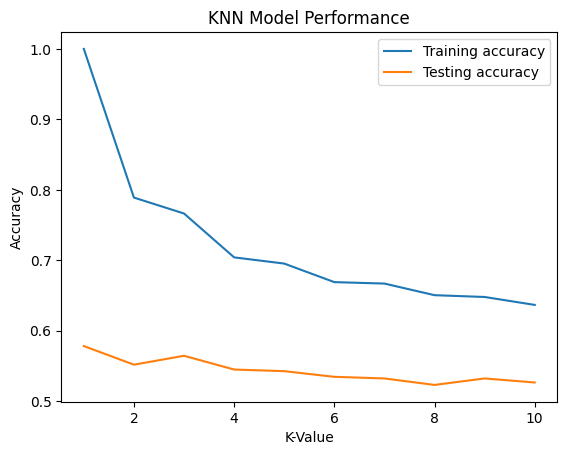

In [ ]:
k_values = range(1, 11)
training_accuracy = []
testing_accuracy = []

from sklearn.neighbors import KNeighborsClassifier

for k_value in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

print("Training Accuracy: ", training_accuracy)
print("Testing Accuracy: ", testing_accuracy)

knn_performance = {'k_values':k_values, 'training_accuracy':training_accuracy, 'testing_accuracy':testing_accuracy}
knn_performance = pd.DataFrame(knn_performance)
sns.lineplot(data=knn_performance, x='k_values', y='training_accuracy', label='Training accuracy')
sns.lineplot(data=knn_performance, x='k_values', y='testing_accuracy', label='Testing accuracy')

plt.title("KNN Model Performance")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
knn_performance.sort_values(by='testing_accuracy', ascending=False)

,k_values,training_accuracy,testing_accuracy
0,1,1.000000,0.578161
2,3,0.766330,0.564368
1,2,0.788956,0.551724
3,4,0.704078,0.544828
4,5,0.695258,0.542529
5,6,0.668925,0.534483
6,7,0.666880,0.532184
8,9,0.647833,0.532184
9,10,0.636584,0.526437
7,8,0.650390,0.522989


## Takeaway

With the above experiment, we will go with k=3

# Submission Prediction

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
clf.fit(X_df, y_df['Transported'].values)

# Generate prediction for spaceship_test_X_v2.csv
y_prediction = clf.predict(X_submission)
print(y_prediction)

[0 1 0 ... 1 1 0]


In [ ]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,False
1,0018_01,True
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [ ]:
submission_dict.to_csv('spaceship_knn_k3_submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>